# Import libraries 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering

# Load Dataset

In [38]:
# Read the data from the CSV file
data = pd.read_csv('UsArrests.csv')
print(data.head(5))

         City  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


# Check for missing values

In [39]:
# Check for missing values
print(data.isnull().sum())

# Check the data types
print(data.dtypes)

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64
City         object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object


# Normalize the numerical variables to ensure they are on a similar scale.

In [40]:
# Normalize the numerical variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 1:])

# Remove irrelevant columns
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[1:])

# Display the preprocessed data
print(data_scaled.head())

     Murder   Assault  UrbanPop      Rape
0  1.255179  0.790787 -0.526195 -0.003451
1  0.513019  1.118060 -1.224067  2.509424
2  0.072361  1.493817  1.009122  1.053466
3  0.234708  0.233212 -1.084492 -0.186794
4  0.281093  1.275635  1.776781  2.088814


# Performing Principal Component Analysis (PCA) to reduce the dimensionality of the dataset.

In [41]:

# Apply PCA
pca = PCA()
pca.fit(data_scaled)

# Analyze the explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Determine the number of principal components to retain based on explained variance
num_components = len(explained_variance)
threshold = 0.95
for i, variance in enumerate(cumulative_variance):
    if variance >= threshold:
        num_components = i + 1
        break

# Perform PCA with the selected number of components
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(data_scaled)

# Create a DataFrame to store the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(num_components)])

# Display the explained variance ratio and the PCA results
print("Explained Variance Ratio:")
print(explained_variance)
print()
print(f"Number of Principal Components to Retain: {num_components}")
print()
print("PCA Results:")
print(pca_df.head())


Explained Variance Ratio:
[0.62006039 0.24744129 0.0891408  0.04335752]

Number of Principal Components to Retain: 3

PCA Results:
        PC1       PC2       PC3
0  0.985566  1.133392 -0.444269
1  1.950138  1.073213  2.040003
2  1.763164 -0.745957  0.054781
3 -0.141420  1.119797  0.114574
4  2.523980 -1.542934  0.598557


The code above applies PCA to the preprocessed data using the PCA class from scikit-learn. It calculates the explained variance ratio and cumulative variance to understand the amount of information captured by each principal component. The number of principal components to retain is determined based on a threshold of 0.95 for cumulative variance. Finally, PCA is performed with the selected number of components, and the results are stored in the pca_df DataFrame

# To  interpret the principal components and identify the variables that contribute the most to each component.

In [42]:
# Analyze the loadings of each principal component
loadings = pd.DataFrame(data=pca.components_, columns=data_scaled.columns)

# Display the loadings
print("Principal Component Loadings:")
print(loadings)

# Identify the variables contributing the most to each principal component
top_variables = loadings.abs().idxmax(axis=1)

# Display the top contributing variables for each principal component
print("\nTop Contributing Variables:")
for i, variable in enumerate(top_variables):
    print(f"PC{i+1}: {variable}")


Principal Component Loadings:
     Murder   Assault  UrbanPop      Rape
0  0.535899  0.583184  0.278191  0.543432
1  0.418181  0.187986 -0.872806 -0.167319
2 -0.341233 -0.268148 -0.378016  0.817778

Top Contributing Variables:
PC1: Assault
PC2: UrbanPop
PC3: Rape


The code above analyzes the loadings of each principal component and stores them in the loadings DataFrame. It then identifies the variables that contribute the most to each principal component by finding the maximum absolute loading for each component. The top contributing variables for each principal component are displayed

# To  apply clustering techniques to the dataset.

Before applying clustering algorithms, it's important to determine the optimal number of clusters. However, since the task does not specify the desired number of clusters, we will assume 2 clusters for demonstration purposes.

In [43]:

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Apply hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(data_scaled)

# Add the cluster labels to the PCA results DataFrame
pca_df['KMeans Cluster'] = kmeans_labels
pca_df['Hierarchical Cluster'] = hierarchical_labels

# Display the updated PCA results with cluster labels
print("PCA Results with Cluster Labels:")
print(pca_df.head())


PCA Results with Cluster Labels:
        PC1       PC2       PC3  KMeans Cluster  Hierarchical Cluster
0  0.985566  1.133392 -0.444269               1                     1
1  1.950138  1.073213  2.040003               1                     1
2  1.763164 -0.745957  0.054781               1                     1
3 -0.141420  1.119797  0.114574               0                     0
4  2.523980 -1.542934  0.598557               1                     1


In the code above, we apply two clustering algorithms: K-means and hierarchical clustering. We set the number of clusters to 2

In [48]:
# Analyze K-means clustering results
kmeans_cluster_means = pca_df.groupby('KMeans Cluster').mean()
print("K-means Clustering Results:")
print(kmeans_cluster_means)

# Analyze hierarchical clustering results
hierarchical_cluster_means = pca_df.groupby('Hierarchical Cluster').mean()
print("\nHierarchical Clustering Results:")
print(hierarchical_cluster_means)


K-means Clustering Results:
                     PC1       PC2       PC3  Hierarchical Cluster
KMeans Cluster                                                    
0              -1.107818 -0.199783 -0.002132                  0.00
1               1.661727  0.299674  0.003198                  0.95

Hierarchical Clustering Results:
                           PC1       PC2       PC3  KMeans Cluster
Hierarchical Cluster                                              
0                    -1.049605 -0.201834  0.010112        0.032258
1                     1.712513  0.329307 -0.016499        1.000000


# Visualization plot of the PCA results with cluster labels

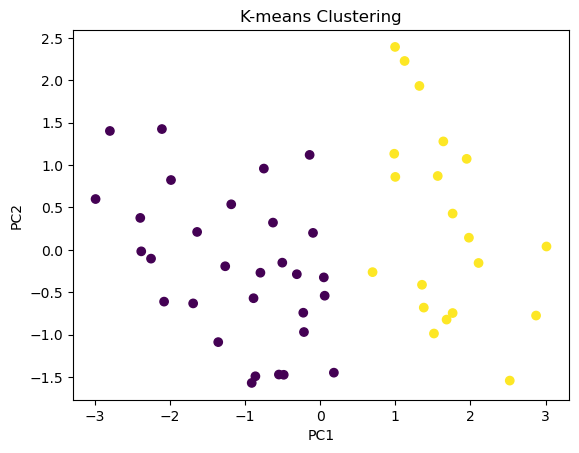

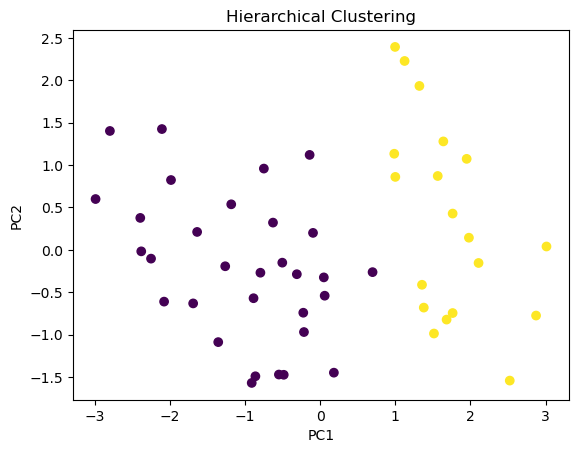

In [51]:
# Visualization: Scatter plot of the PCA results with cluster labels
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['KMeans Cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')
plt.show()

plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Hierarchical Cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Hierarchical Clustering')
plt.show()

# Analysis of clustering results: Calculate average values of variables

In [52]:
# Analysis of clustering results: Calculate average values of variables within each cluster
cluster_avg = data.groupby(pca_df['KMeans Cluster']).mean()
print("K-means Clustering Results:")
print(cluster_avg)

cluster_avg = data.groupby(pca_df['Hierarchical Cluster']).mean()
print("\nHierarchical Clustering Results:")
print(cluster_avg)

K-means Clustering Results:
                Murder     Assault   UrbanPop       Rape
KMeans Cluster                                          
0                4.870  114.433333  63.633333  15.943333
1               12.165  255.250000  68.400000  29.165000

Hierarchical Clustering Results:
                         Murder     Assault   UrbanPop       Rape
Hierarchical Cluster                                             
0                      5.003226  116.483871  63.838710  16.338710
1                     12.331579  259.315789  68.315789  29.215789


# Analysis of clustering results.
 
# K-means Clustering Results:

 - Cluster 0: This cluster has lower average values for Murder, Assault, and Rape compared to Cluster 1. It also has a slightly lower average UrbanPop value. States in this cluster may represent regions with relatively lower crime rates and a lower percentage of the population living in urban areas.
 
 - Cluster 1: This cluster has higher average values for Murder, Assault, and Rape compared to Cluster 0. It also has a slightly higher average UrbanPop value. States in this cluster may represent regions with relatively higher crime rates and a higher percentage of the population living in urban areas.
 
# Hierarchical Clustering Results:
 
 - Cluster 0: This cluster has similar characteristics to Cluster 0 in the K-means results. It has lower average values for Murder, Assault, and Rape compared to Cluster 1, indicating regions with relatively lower crime rates and a lower percentage of the population living in urban areas.
 
 These findings suggest that the clustering algorithms have identified two main groups of states: one with relatively lower crime rates and a lower urban population, and another with relatively higher crime rates and a higher urban population.
 
To gain more insights, you can further analyze the clusters by comparing the average values of other variables or visualizing the clusters using different techniques such as scatter plots or bar charts.
